In [1]:
from google.colab import files

# Upload the file from your local system
uploaded = files.upload()


Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv


Davies-Bouldin Index: 1.01


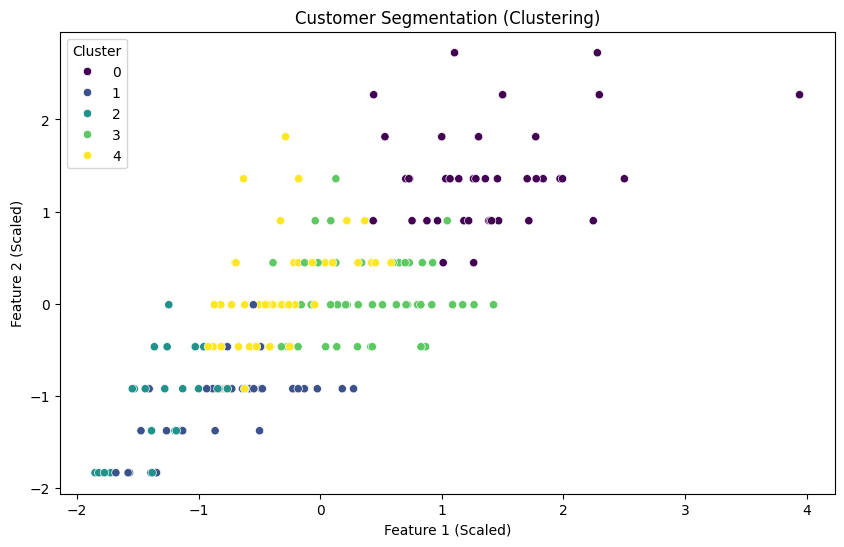

  CustomerID  TotalValue  TransactionID  Quantity       Price  Cluster
0      C0001     3354.52              5        12  278.334000        3
1      C0002     1862.74              4        10  208.920000        4
2      C0003     2725.38              4        14  195.707500        4
3      C0004     5354.88              8        23  240.636250        0
4      C0005     2034.24              3         7  291.603333        1


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets for comprehensive analysis, ensuring Price is from Transactions dataset
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Ensure the 'Price' from Transactions.csv is used, if there's a conflict (e.g., Price_x and Price_y)
merged_data['Price'] = merged_data['Price_y']  # Use Price from Transactions.csv (assuming 'Price_y' is from Transactions.csv)
merged_data.drop(columns=['Price_x', 'Price_y'], inplace=True)  # Drop the unnecessary columns

# Data preprocessing: Select relevant features for clustering
# Aggregating customer-level data
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',         # Total spend by the customer
    'TransactionID': 'count',    # Number of transactions
    'Quantity': 'sum',           # Total quantity of products purchased
    'Price': 'mean'              # Average price of products purchased
}).reset_index()

# Data Scaling: Normalize the features to bring them to the same scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])  # Exclude 'CustomerID'

# Apply KMeans clustering (Choose number of clusters as 5 for example)
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate clustering: Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Segmentation (Clustering)')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

# Save the clustering results
customer_features.to_csv('Clustering_Results.csv', index=False)

# Display the first few rows of clustering results
print(customer_features.head())
